In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('snu_friendship.csv')

# Select relevant columns
columns = ['Hobby_top1', 'Hobby top2', 'Club top1', 'Club top 2', 'Teamwork preference  \n ']
df_selected = df[columns]

# Handle missing values (if any)
df_selected = df_selected.dropna()

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_selected)


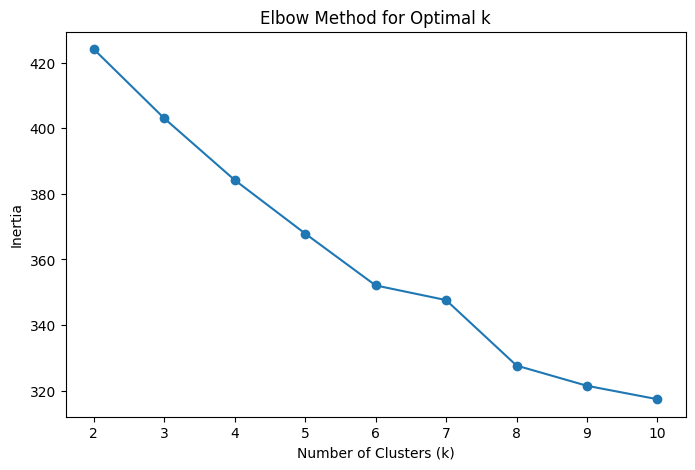

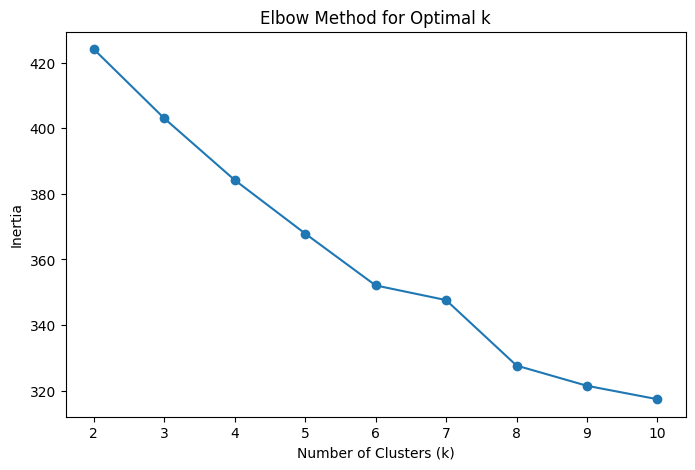

Cluster sizes:
Cluster 2: 29 students
Cluster 0: 23 students
Cluster 1: 30 students
Cluster 3: 29 students


In [5]:

# Determine optimal k using elbow method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (manually from elbow plot, assuming k=4 for now)
optimal_k = 4

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Print cluster sizes
from collections import Counter
cluster_counts = Counter(clusters)
print("Cluster sizes:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} students")


Optimal k: 4
Silhouette Score: 0.0720
Davies-Bouldin Index: 2.9372


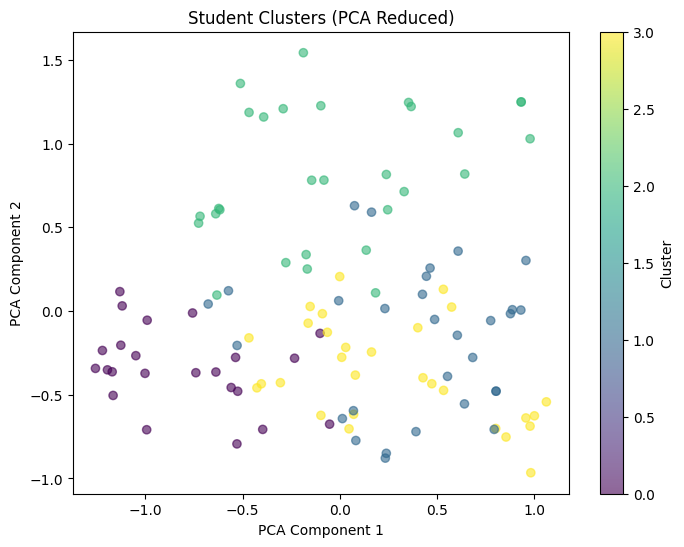

In [6]:
# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Compute evaluation metrics
silhouette = silhouette_score(encoded_data, clusters)
davies_bouldin = davies_bouldin_score(encoded_data, clusters)

print(f"Optimal k: {optimal_k}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Student Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
